# Testing Data Processing

## Define necessary variables

In [1]:
# Create a directory to save the files
save_dir = './../data/vietnam_cloud_data'
# List of selected years
years = ['2001', '2003', '2005', '2007', '2009', '2011', '2013', '2015', '2017', '2019', '2021', '2023']
# List of selected months
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
# List of selected days
days = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
# Time intervals for every 2 hours
times = ['00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00']
# North, West, South, East coordinates for Vietnam
vietnam_area = [23, 102, 8, 110]

## Pull data from cds api

Get the api keys and pull data from the [CDS Website](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview)
Be mindful of the data limit per request to split up downloads accordingly.

In [2]:
import os
import cdsapi

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Initialize the CDS API client
c = cdsapi.Client()

# Loop over each year and retrieve data
# for year in years:
#     c.retrieve(
#         'reanalysis-era5-single-levels',
#         {
#             'product_type': 'reanalysis',
#             'format': 'netcdf',
#             'variable': [
#                 'total_cloud_cover', 'high_cloud_cover', 'medium_cloud_cover', 'low_cloud_cover',
#                 'total_column_cloud_ice_water', 'total_column_cloud_liquid_water'
#             ],
#             'year': year,
#             'month': days,
#             'day': days,
#             'time': times,
#             'area': vietnam_area,
#         },
#         os.path.join(save_dir, f'vietnam_cloud_data_{year}.nc')
#     )

## Preprocess downloaded data

### Combine data files

Combine all the separately downloaded file into one and load into panda dataframe.

In [3]:
import xarray as xr
import pandas as pd

years = ['2017', '2019', '2021']
variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']

# List of yearly files
yearly_files = [f'./../data/vietnam_cloud_data/vietnam_cloud_data_{year}.nc' for year in years]

# Load datasets and inspect their time coordinates
datasets = []
for file, year in zip(yearly_files, years):
    ds = xr.open_dataset(file)
    # Inspect the time coordinates
    print(f"Time coordinates for {year}: {ds['time'].values}")
    datasets.append(ds)

# Combine datasets
combined_ds = xr.concat(datasets, dim='time')

# Save the combined dataset if needed
# combined_ds.to_netcdf('./../data/vietnam_cloud_data/vietnam_cloud_data_combined_train.nc')

# Print available variables
print(combined_ds.data_vars)

# Convert to DataFrame
train_df = combined_ds[variables].to_dataframe().reset_index()

train_df

Time coordinates for 2017: ['2017-01-01T00:00:00.000000000' '2017-01-01T02:00:00.000000000'
 '2017-01-01T04:00:00.000000000' ... '2017-12-31T18:00:00.000000000'
 '2017-12-31T20:00:00.000000000' '2017-12-31T22:00:00.000000000']
Time coordinates for 2019: ['2019-01-01T00:00:00.000000000' '2019-01-01T02:00:00.000000000'
 '2019-01-01T04:00:00.000000000' ... '2019-12-31T18:00:00.000000000'
 '2019-12-31T20:00:00.000000000' '2019-12-31T22:00:00.000000000']
Time coordinates for 2021: ['2021-01-01T00:00:00.000000000' '2021-01-01T02:00:00.000000000'
 '2021-01-01T04:00:00.000000000' ... '2021-12-31T18:00:00.000000000'
 '2021-12-31T20:00:00.000000000' '2021-12-31T22:00:00.000000000']
Data variables:
    tcc      (time, latitude, longitude) float64 212MB 0.5256 0.506 ... 0.8942
    hcc      (time, latitude, longitude) float64 212MB 0.0 0.0 ... 0.8829 0.8007
    mcc      (time, latitude, longitude) float64 212MB 0.2506 0.3622 ... 0.4152
    lcc      (time, latitude, longitude) float64 212MB 0.5124 0

,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2017-01-01 00:00:00,23.0,102.00,0.525567,0.000000,0.250637,0.512414,0.000099,0.070842
1,2017-01-01 00:00:00,23.0,102.25,0.505974,0.000000,0.362245,0.413822,0.000232,0.116466
2,2017-01-01 00:00:00,23.0,102.50,0.582821,0.000000,0.546229,0.453558,0.000431,0.165266
3,2017-01-01 00:00:00,23.0,102.75,0.736057,0.000000,0.704470,0.666748,0.001591,0.184132
4,2017-01-01 00:00:00,23.0,103.00,0.927578,0.000000,0.837547,0.890101,0.002585,0.187934
...,...,...,...,...,...,...,...,...,...
26450815,2021-12-31 22:00:00,8.0,109.00,0.990325,0.990325,0.451788,0.313903,0.056379,0.136749
26450816,2021-12-31 22:00:00,8.0,109.25,0.981109,0.972899,0.388247,0.290678,0.045396,0.119237
26450817,2021-12-31 22:00:00,8.0,109.50,0.953336,0.930691,0.342652,0.230647,0.022069,0.106071
26450818,2021-12-31 22:00:00,8.0,109.75,0.919796,0.882899,0.345215,0.178429,0.004455,0.102507


Do the same for test data

In [4]:
years = ['2023']

# List of yearly files
yearly_files = [f'./../data/vietnam_cloud_data/vietnam_cloud_data_{year}.nc' for year in years]

# Load datasets and inspect their time coordinates
datasets = []
for file, year in zip(yearly_files, years):
    ds = xr.open_dataset(file)
    # Inspect the time coordinates
    print(f"Time coordinates for {year}: {ds['time'].values}")
    datasets.append(ds)

# Combine datasets
combined_ds = xr.concat(datasets, dim='time')

# Save the combined dataset if needed
# combined_ds.to_netcdf('./../data/vietnam_cloud_data/vietnam_cloud_data_combined_test.nc')

# Print available variables
print(combined_ds.data_vars)

# List of variables
variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']

# Convert to DataFrame
test_df = combined_ds[variables].to_dataframe().reset_index()

test_df

Time coordinates for 2023: ['2023-01-01T00:00:00.000000000' '2023-01-01T02:00:00.000000000'
 '2023-01-01T04:00:00.000000000' ... '2023-12-31T18:00:00.000000000'
 '2023-12-31T20:00:00.000000000' '2023-12-31T22:00:00.000000000']
Data variables:
    tcc      (time, latitude, longitude) float64 71MB 0.8234 0.9716 ... 0.9897
    hcc      (time, latitude, longitude) float64 71MB 0.0 0.0 ... 0.8556 0.9811
    mcc      (time, latitude, longitude) float64 71MB 0.6642 0.5365 ... 0.1711
    lcc      (time, latitude, longitude) float64 71MB 0.7969 0.9683 ... 0.1567
    tciw     (time, latitude, longitude) float64 71MB 0.00292 ... 0.001371
    tclw     (time, latitude, longitude) float64 71MB 0.2274 0.2354 ... 0.04199


,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2023-01-01 00:00:00,23.0,102.00,0.823432,0.000000,0.664184,0.796850,0.002920,0.227390
1,2023-01-01 00:00:00,23.0,102.25,0.971617,0.000000,0.536493,0.968291,0.001609,0.235440
2,2023-01-01 00:00:00,23.0,102.50,0.954435,0.000000,0.358155,0.947935,0.000775,0.302221
3,2023-01-01 00:00:00,23.0,102.75,0.977752,0.000000,0.214899,0.974578,0.000536,0.256048
4,2023-01-01 00:00:00,23.0,103.00,1.000000,0.000000,0.111242,1.000000,0.000179,0.073800
...,...,...,...,...,...,...,...,...,...
8816935,2023-12-31 22:00:00,8.0,109.00,0.704988,0.679444,0.075565,0.165565,0.000298,0.030010
8816936,2023-12-31 22:00:00,8.0,109.25,0.663238,0.624327,0.133795,0.161781,0.000298,0.040313
8816937,2023-12-31 22:00:00,8.0,109.50,0.741031,0.691011,0.202661,0.153999,0.000536,0.048234
8816938,2023-12-31 22:00:00,8.0,109.75,0.896327,0.855554,0.218897,0.160011,0.000894,0.049780


### Visualize data

In [5]:
print(train_df.count())

time         26450820
latitude     26450820
longitude    26450820
tcc          26450820
hcc          26450820
mcc          26450820
lcc          26450820
tciw         26450820
tclw         26450820
dtype: int64


In [6]:
print(test_df.count())

time         8816940
latitude     8816940
longitude    8816940
tcc          8816940
hcc          8816940
mcc          8816940
lcc          8816940
tciw         8816940
tclw         8816940
dtype: int64


This is will show which column is missing how many values compare to the rest of the dataset. Nothing = Good

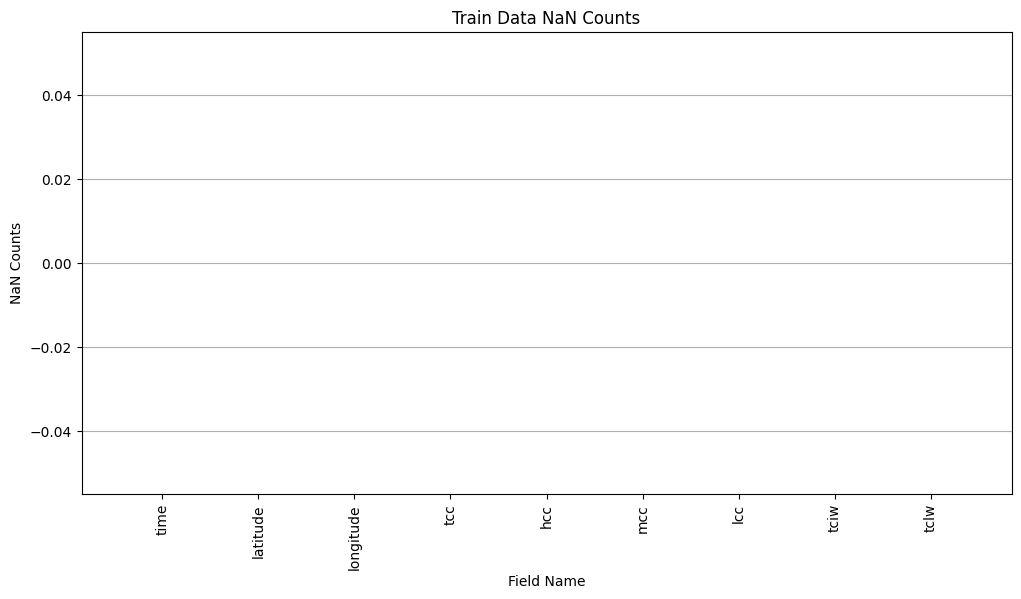

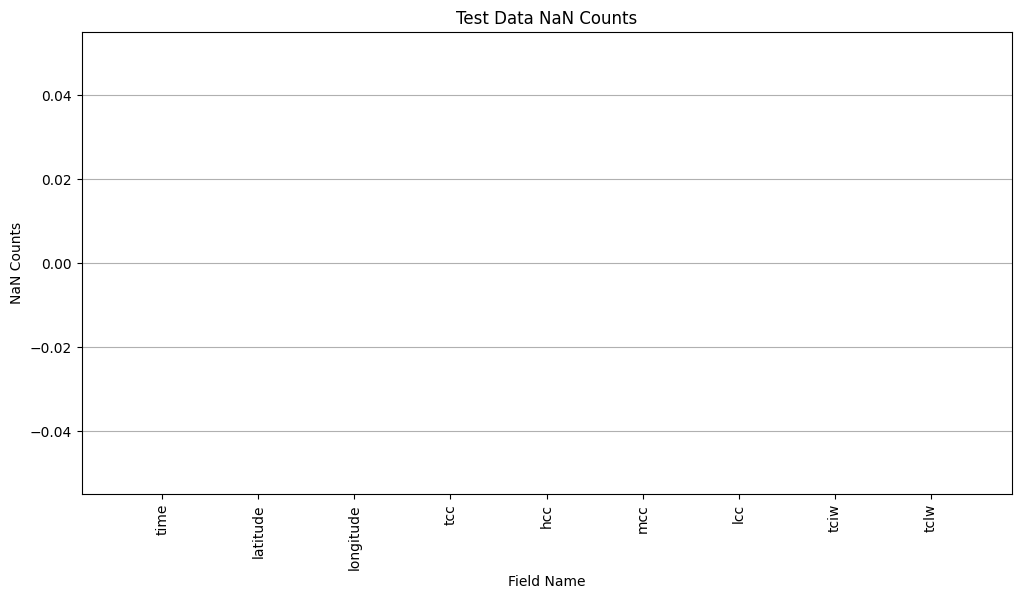

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_nan_counts(df, title="NaN Counts by Column"):
    """
    Plots the number of NaN counts for each column in the dataset using Matplotlib.

    Parameters:
    df (pd.DataFrame): The dataset as a Pandas DataFrame.
    """
    # Calculate NaN counts
    nan_counts = df.isna().sum().sort_values(ascending=False).to_frame()
    nan_counts = nan_counts.reset_index()
    nan_counts.columns = ["Field Name", "NaN Counts"]

    # Plot NaN counts
    plt.figure(figsize=(12, 6))
    plt.bar(nan_counts["Field Name"], nan_counts["NaN Counts"], color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel("Field Name")
    plt.ylabel("NaN Counts")
    plt.title(title)
    plt.grid(axis='y')
    plt.show()
    
plot_nan_counts(train_df, title="Train Data NaN Counts")
plot_nan_counts(test_df, title="Test Data NaN Counts")


In [8]:
# Process the DataFrame to handle missing values, etc.
# df = df.dropna()

# # Convert timestamps to a datetime format
train_df['time'] = pd.to_datetime(train_df['time'])

# Print the count of non-missing values in each column
print(train_df.count())

# Visualize data in the DataFrame
train_df
# Save the DataFrame to a CSV file for easier inspection if needed
# df.to_csv('./../data/vietnam_cloud_data_2023.csv', index=False)

time         26450820
latitude     26450820
longitude    26450820
tcc          26450820
hcc          26450820
mcc          26450820
lcc          26450820
tciw         26450820
tclw         26450820
dtype: int64


,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2017-01-01 00:00:00,23.0,102.00,0.525567,0.000000,0.250637,0.512414,0.000099,0.070842
1,2017-01-01 00:00:00,23.0,102.25,0.505974,0.000000,0.362245,0.413822,0.000232,0.116466
2,2017-01-01 00:00:00,23.0,102.50,0.582821,0.000000,0.546229,0.453558,0.000431,0.165266
3,2017-01-01 00:00:00,23.0,102.75,0.736057,0.000000,0.704470,0.666748,0.001591,0.184132
4,2017-01-01 00:00:00,23.0,103.00,0.927578,0.000000,0.837547,0.890101,0.002585,0.187934
...,...,...,...,...,...,...,...,...,...
26450815,2021-12-31 22:00:00,8.0,109.00,0.990325,0.990325,0.451788,0.313903,0.056379,0.136749
26450816,2021-12-31 22:00:00,8.0,109.25,0.981109,0.972899,0.388247,0.290678,0.045396,0.119237
26450817,2021-12-31 22:00:00,8.0,109.50,0.953336,0.930691,0.342652,0.230647,0.022069,0.106071
26450818,2021-12-31 22:00:00,8.0,109.75,0.919796,0.882899,0.345215,0.178429,0.004455,0.102507


In [9]:
# Process the DataFrame to handle missing values, etc.
# df = df.dropna()

# # Convert timestamps to a datetime format
test_df['time'] = pd.to_datetime(test_df['time'])

# Print the count of non-missing values in each column
print(test_df.count())

# Visualize data in the DataFrame
test_df
# Save the DataFrame to a CSV file for easier inspection if needed
# df.to_csv('./../data/vietnam_cloud_data_2023.csv', index=False)

time         8816940
latitude     8816940
longitude    8816940
tcc          8816940
hcc          8816940
mcc          8816940
lcc          8816940
tciw         8816940
tclw         8816940
dtype: int64


,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2023-01-01 00:00:00,23.0,102.00,0.823432,0.000000,0.664184,0.796850,0.002920,0.227390
1,2023-01-01 00:00:00,23.0,102.25,0.971617,0.000000,0.536493,0.968291,0.001609,0.235440
2,2023-01-01 00:00:00,23.0,102.50,0.954435,0.000000,0.358155,0.947935,0.000775,0.302221
3,2023-01-01 00:00:00,23.0,102.75,0.977752,0.000000,0.214899,0.974578,0.000536,0.256048
4,2023-01-01 00:00:00,23.0,103.00,1.000000,0.000000,0.111242,1.000000,0.000179,0.073800
...,...,...,...,...,...,...,...,...,...
8816935,2023-12-31 22:00:00,8.0,109.00,0.704988,0.679444,0.075565,0.165565,0.000298,0.030010
8816936,2023-12-31 22:00:00,8.0,109.25,0.663238,0.624327,0.133795,0.161781,0.000298,0.040313
8816937,2023-12-31 22:00:00,8.0,109.50,0.741031,0.691011,0.202661,0.153999,0.000536,0.048234
8816938,2023-12-31 22:00:00,8.0,109.75,0.896327,0.855554,0.218897,0.160011,0.000894,0.049780


See cloud over at a specific (lat, long) location for each catagory.

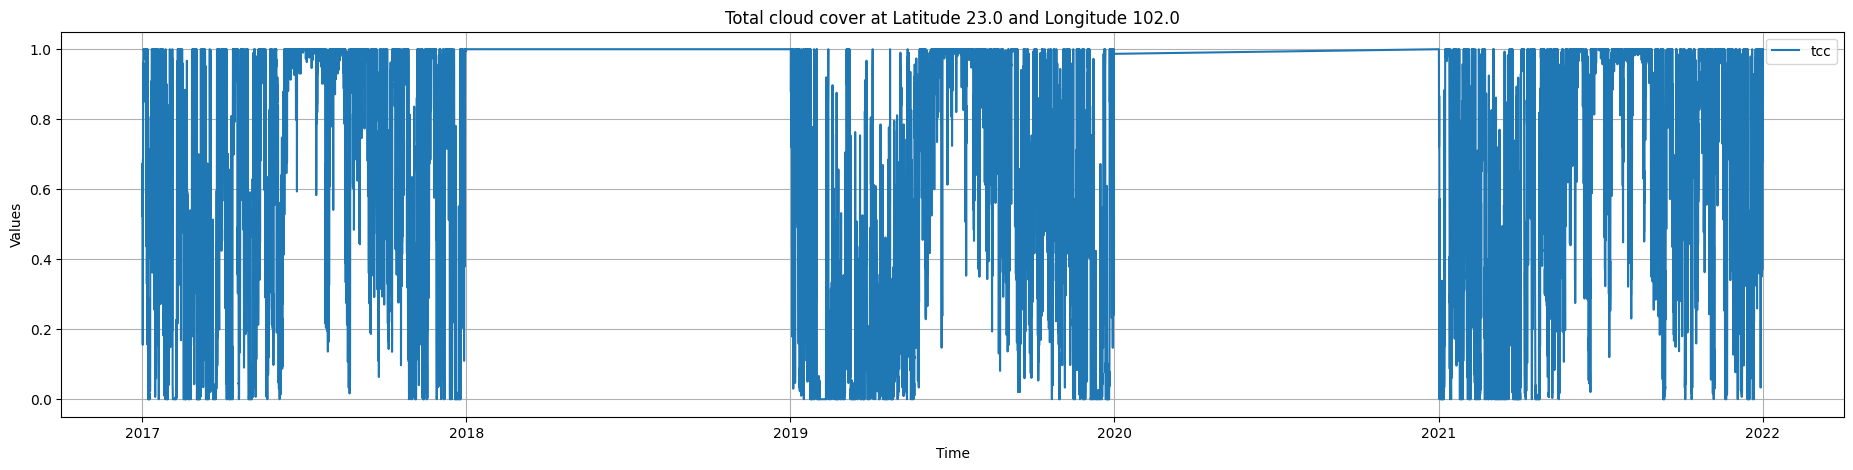

In [10]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['tcc']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

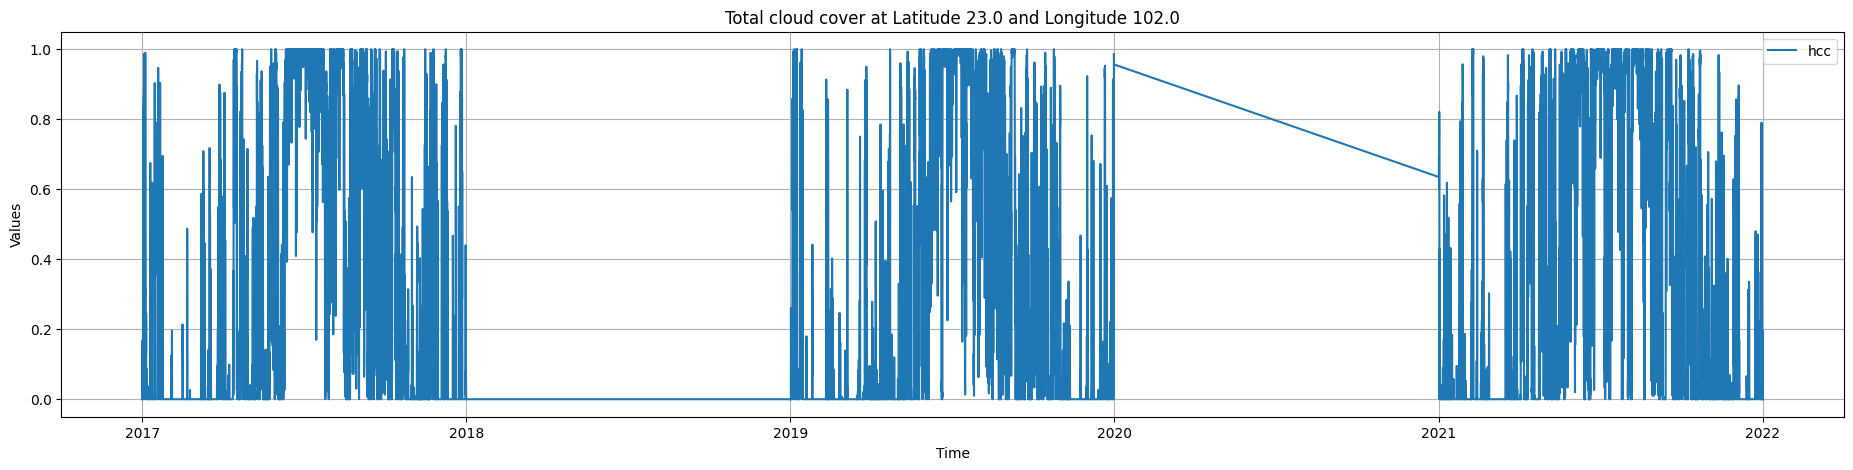

In [11]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['hcc']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

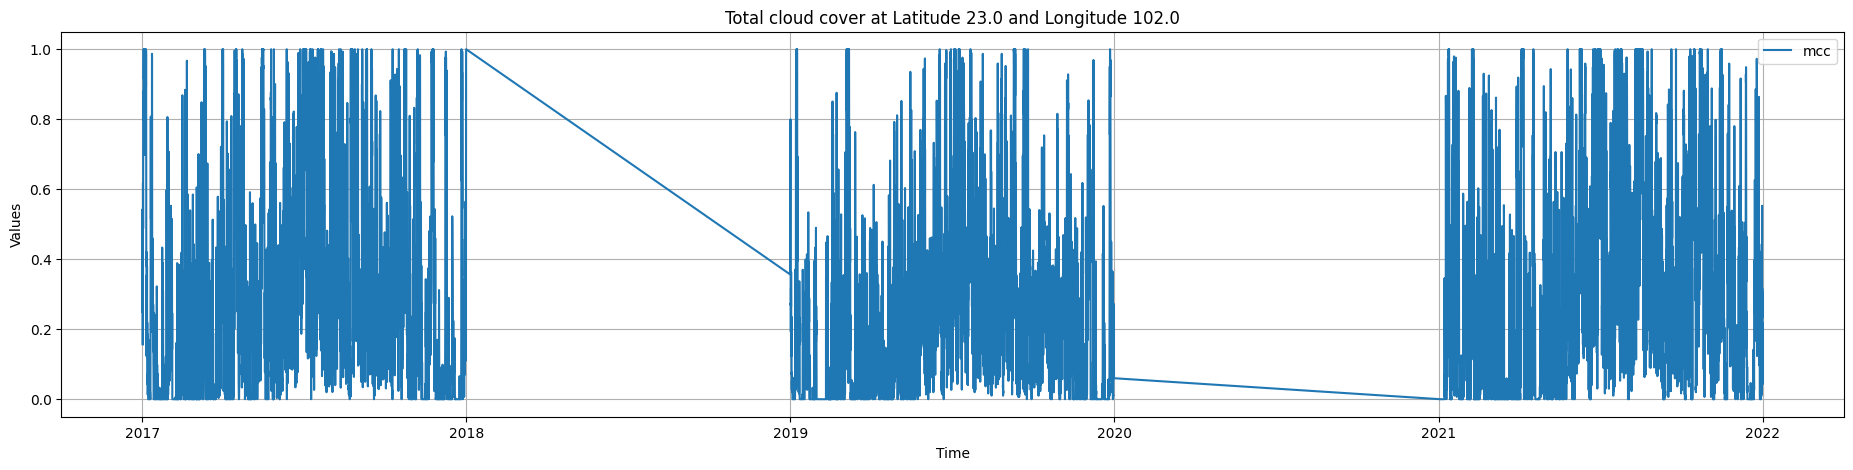

In [12]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['mcc']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

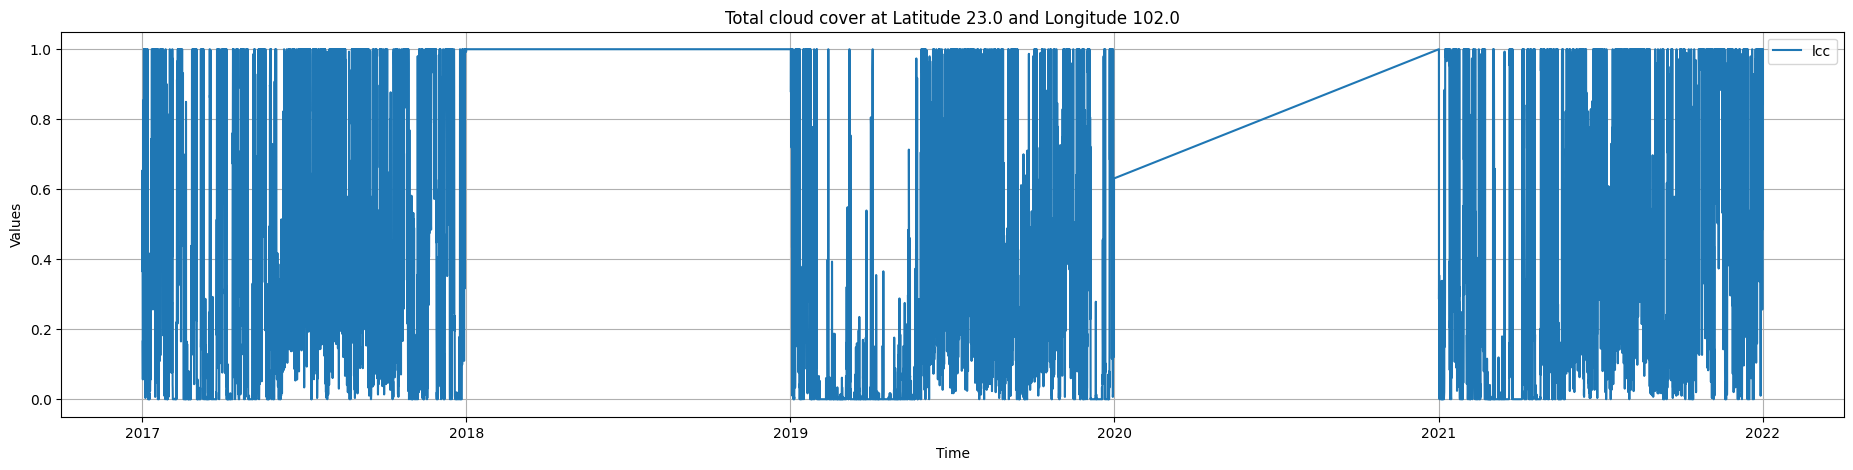

In [13]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['lcc']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

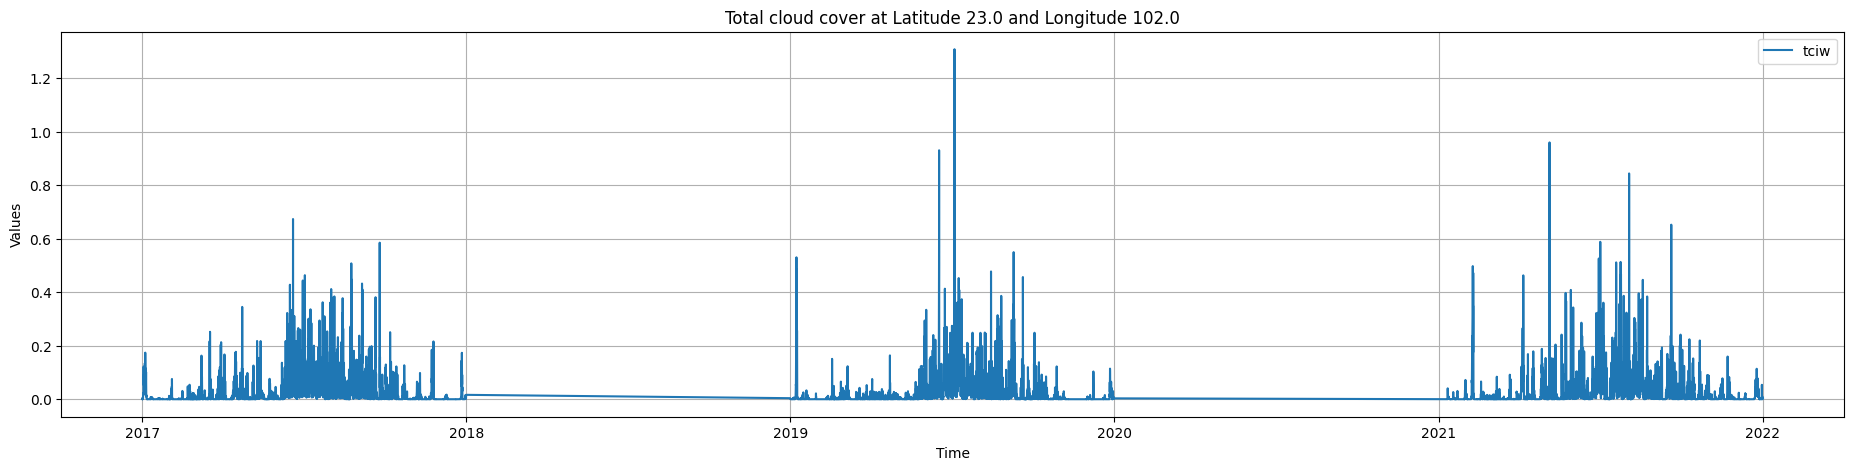

In [14]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['tciw']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

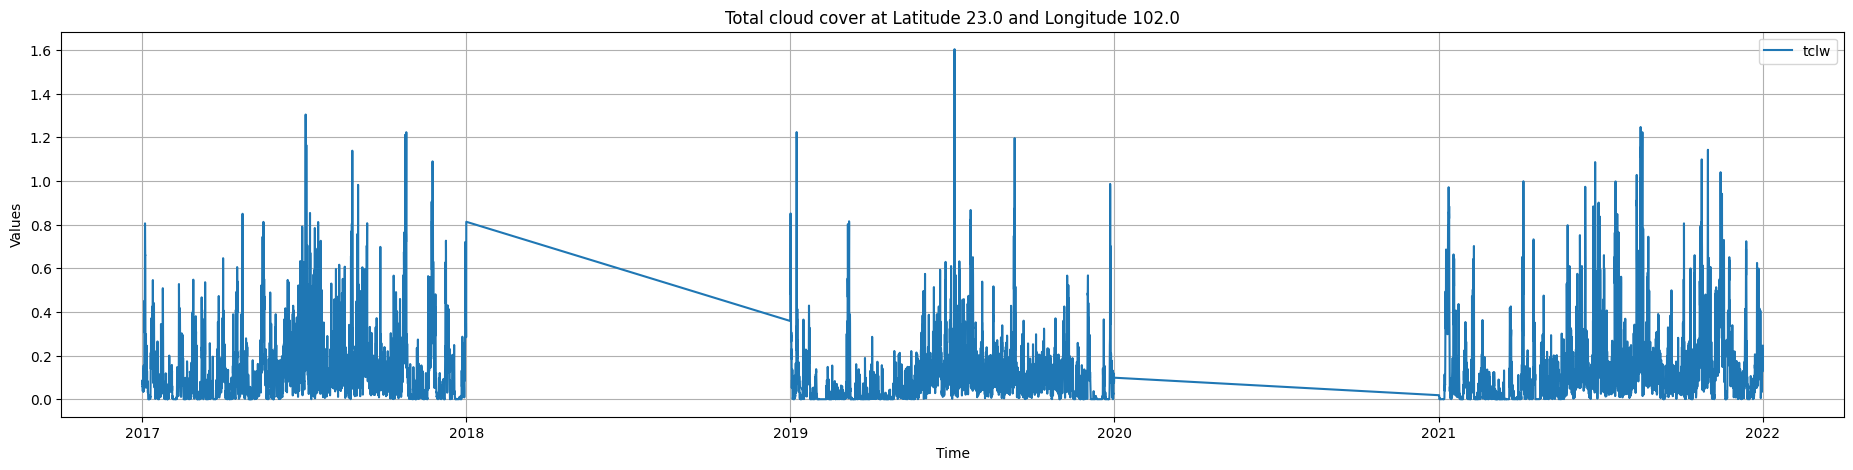

In [15]:
import seaborn as sns

# Filter the DataFrame for a specific latitude and longitude
latitude = 23.0
longitude = 102.0
filtered_df = train_df[(train_df['latitude'] == latitude) & (train_df['longitude'] == longitude)]

# Plot the time series for the variables of interest
# variables = ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw']
variables = ['tclw']


plt.figure(figsize=(23, 5))
for var in variables:
    sns.lineplot(data=filtered_df, x='time', y=var, label=var)

plt.title(f'Total cloud cover at Latitude {latitude} and Longitude {longitude}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

## Preprocessing

### Prepare raw data

#### Training Data

To use the TFT model implementation in the `Pytorch Forecasting` library, the TimeSeriesDataSet class was used to encapsulate the data, its variables (names of the target variable, static covariates, time varying known and unknown variables, lagged values), variable encoders, scalers, the max and min lengths of the encoder input and decoder output, etc. 

Static convariates in TFT consist in static metadata about measured entities that do no depend on time. In this dataset, static covariates consist in `latitude` and `longtitude` features.

Static covariates are used to define `groups` to separate individual times series. The number of time series present in our dataset is the number of all possible combinations of static covariates values.

`TimeSeriesDataSet` also expects the provided data to contain an integer column denoting the time index. This time index should start by 1 and increment by +1 for each individual time series if there are no missing time steps. In this dataset, there are 365 days in a year and 12 data points a day (every 2 hours).

Replace our date column with time_idx:

Extract `time` column into `date` and `hour`

In [16]:
train_df

,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2017-01-01 00:00:00,23.0,102.00,0.525567,0.000000,0.250637,0.512414,0.000099,0.070842
1,2017-01-01 00:00:00,23.0,102.25,0.505974,0.000000,0.362245,0.413822,0.000232,0.116466
2,2017-01-01 00:00:00,23.0,102.50,0.582821,0.000000,0.546229,0.453558,0.000431,0.165266
3,2017-01-01 00:00:00,23.0,102.75,0.736057,0.000000,0.704470,0.666748,0.001591,0.184132
4,2017-01-01 00:00:00,23.0,103.00,0.927578,0.000000,0.837547,0.890101,0.002585,0.187934
...,...,...,...,...,...,...,...,...,...
26450815,2021-12-31 22:00:00,8.0,109.00,0.990325,0.990325,0.451788,0.313903,0.056379,0.136749
26450816,2021-12-31 22:00:00,8.0,109.25,0.981109,0.972899,0.388247,0.290678,0.045396,0.119237
26450817,2021-12-31 22:00:00,8.0,109.50,0.953336,0.930691,0.342652,0.230647,0.022069,0.106071
26450818,2021-12-31 22:00:00,8.0,109.75,0.919796,0.882899,0.345215,0.178429,0.004455,0.102507


In [17]:
# Ensure 'time' is in datetime format
train_df['time'] = pd.to_datetime(train_df['time'])

# Drop duplicates to get unique time values and reset index
unique_times = train_df[['time']].drop_duplicates(ignore_index=True)

# Extract 'date' and 'hour' from 'time'
unique_times['date'] = unique_times['time'].dt.date
unique_times['hour_id'] = unique_times['time'].dt.hour

# Factorize the 'date' column to get an incrementing count
unique_times['date_id'] = pd.factorize(unique_times['date'])[0]

# # Drop the original 'date' column
unique_times = unique_times.drop(['date'], axis=1)

unique_times

,time,hour_id,date_id
0,2017-01-01 00:00:00,0,0
1,2017-01-01 02:00:00,2,0
2,2017-01-01 04:00:00,4,0
3,2017-01-01 06:00:00,6,0
4,2017-01-01 08:00:00,8,0
...,...,...,...
13135,2021-12-31 14:00:00,14,1094
13136,2021-12-31 16:00:00,16,1094
13137,2021-12-31 18:00:00,18,1094
13138,2021-12-31 20:00:00,20,1094


In [18]:
# Merge the DataFrames on the 'time' column
merged_df = pd.merge(train_df, unique_times, on='time')

# Reorder columns to place 'hour_id' and 'date_id' at the beginning
cols = ['date_id', 'hour_id'] + [col for col in merged_df.columns if col not in ['hour_id', 'date_id']]
merged_df = merged_df[cols]

# # Drop the original 'time' and 'hour' column
train_df = merged_df.drop(['time'], axis=1)

train_df


,date_id,hour_id,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,0,0,23.0,102.00,0.525567,0.000000,0.250637,0.512414,0.000099,0.070842
1,0,0,23.0,102.25,0.505974,0.000000,0.362245,0.413822,0.000232,0.116466
2,0,0,23.0,102.50,0.582821,0.000000,0.546229,0.453558,0.000431,0.165266
3,0,0,23.0,102.75,0.736057,0.000000,0.704470,0.666748,0.001591,0.184132
4,0,0,23.0,103.00,0.927578,0.000000,0.837547,0.890101,0.002585,0.187934
...,...,...,...,...,...,...,...,...,...,...
26450815,1094,22,8.0,109.00,0.990325,0.990325,0.451788,0.313903,0.056379,0.136749
26450816,1094,22,8.0,109.25,0.981109,0.972899,0.388247,0.290678,0.045396,0.119237
26450817,1094,22,8.0,109.50,0.953336,0.930691,0.342652,0.230647,0.022069,0.106071
26450818,1094,22,8.0,109.75,0.919796,0.882899,0.345215,0.178429,0.004455,0.102507


#### Testing Data

In [19]:
test_df

,time,latitude,longitude,tcc,hcc,mcc,lcc,tciw,tclw
0,2023-01-01 00:00:00,23.0,102.00,0.823432,0.000000,0.664184,0.796850,0.002920,0.227390
1,2023-01-01 00:00:00,23.0,102.25,0.971617,0.000000,0.536493,0.968291,0.001609,0.235440
2,2023-01-01 00:00:00,23.0,102.50,0.954435,0.000000,0.358155,0.947935,0.000775,0.302221
3,2023-01-01 00:00:00,23.0,102.75,0.977752,0.000000,0.214899,0.974578,0.000536,0.256048
4,2023-01-01 00:00:00,23.0,103.00,1.000000,0.000000,0.111242,1.000000,0.000179,0.073800
...,...,...,...,...,...,...,...,...,...
8816935,2023-12-31 22:00:00,8.0,109.00,0.704988,0.679444,0.075565,0.165565,0.000298,0.030010
8816936,2023-12-31 22:00:00,8.0,109.25,0.663238,0.624327,0.133795,0.161781,0.000298,0.040313
8816937,2023-12-31 22:00:00,8.0,109.50,0.741031,0.691011,0.202661,0.153999,0.000536,0.048234
8816938,2023-12-31 22:00:00,8.0,109.75,0.896327,0.855554,0.218897,0.160011,0.000894,0.049780


In [20]:
# Ensure 'time' is in datetime format
test_df['time'] = pd.to_datetime(test_df['time'])

# Drop duplicates to get unique time values and reset index
unique_times = test_df[['time']].drop_duplicates(ignore_index=True)

# Extract 'date' and 'hour' from 'time'
unique_times['date'] = unique_times['time'].dt.date
unique_times['hour_id'] = unique_times['time'].dt.hour

# Factorize the 'date' column to get an incrementing count
unique_times['date_id'] = pd.factorize(unique_times['date'])[0]

# # Drop the original 'date' column
unique_times = unique_times.drop(['date'], axis=1)

# Merge the DataFrames on the 'time' column
merged_df = pd.merge(test_df, unique_times, on='time')

# Reorder columns to place 'hour_id' and 'date_id' at the beginning
cols = ['date_id', 'hour_id'] + [col for col in merged_df.columns if col not in ['hour_id', 'date_id']]
merged_df = merged_df[cols]

# Drop the original 'time' and 'hour' column
merged_df = merged_df.drop(['time'], axis=1)

# Assuming 'test_df' is your DataFrame
columns_to_remove = ["tcc", "hcc", "mcc", "lcc", "tciw", "tclw"]

# Remove the specified columns
test_df = merged_df.drop(columns=columns_to_remove)

test_df

,date_id,hour_id,latitude,longitude
0,0,0,23.0,102.00
1,0,0,23.0,102.25
2,0,0,23.0,102.50
3,0,0,23.0,102.75
4,0,0,23.0,103.00
...,...,...,...,...
8816935,364,22,8.0,109.00
8816936,364,22,8.0,109.25
8816937,364,22,8.0,109.50
8816938,364,22,8.0,109.75


Checking for data consistency

In [21]:
import numpy as np

# Check for any missing combinations of date_id and hour_id
def consistency_check(df):
    expected_hour_ids = set(np.arange(0, 24, 2))
    for date in df['date_id'].unique():
        actual_hour_ids = set(df[df['date_id'] == date]['hour_id'])
        missing_hour_ids = expected_hour_ids - actual_hour_ids
        if missing_hour_ids:
            print(f"Missing hour_id(s) for date_id {date}: {missing_hour_ids}")
            
consistency_check(train_df)
consistency_check(test_df)

### Train/Val Split

`Training Cutoff`: The training_cutoff ensures that there is a clear separation between the data used for training the model and the data used for evaluating its performance. This is crucial for time series forecasting to prevent data leakage and ensure that the model is evaluated on future data that it has not seen during training.

`max_prediction_length`: This parameter defines the maximum length of the prediction horizon. In this case, it is set to 365, which means the model will predict the target values for the next 365 time steps.

`max_encoder_length`: This parameter defines the maximum length of the input sequence (encoder) that the model will use to make predictions. Here, it is also set to 365, meaning the model will use the past 365 time steps to make the prediction.

In [22]:
max_prediction_length = 365 # a whole year
max_encoder_length = 365

This means that if we load data from year [1, 2, 3] training will be done on year [1, 2] validating will be on year [3].

In [23]:
training_cutoff = train_df["date_id"].max() - max_prediction_length
training_cutoff

729

## Training and Validating

Pytorch Forecasting implementation is based on *Pytorch Lightning*. Hence, to train the model, we need to define a `Trainer` object and `dataloaders`

### Dataloader

If the time series data are different in magnitude between different groups, using a `GroupNormalizer` to normalize each time-series individually will be better. And, if need, to account for the autocorrelation in the data, add lagged features.

In [24]:
import lightning.pytorch as pl
import torch
import pickle
import optuna

from pytorch_lightning.callbacks.progress import TQDMProgressBar
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, MultiNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

c:\USERS\BLACK\DESKTOP\PROJECTS\TRANSFORMERS\WEATHER_FORECAST\WEATHER_ENV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


`Group IDs`:latitude and longitude are used together to define unique locations. This ensures that predictions are location-specific.

`Time Variables`: Both date_id and hour_id are included as time-related features to capture daily and hourly variations.
`Target Variables`:

The variables ['tcc', 'hcc', 'mcc', 'lcc', 'tciw', 'tclw'] are set as targets to predict for each location and time step.

`MultiNormalizer`: MultiNormalizer is used when there are multiple target variables.
Each target is normalized independently using the specified normalizer. In this case, GroupNormalizer is used for each target.

`GroupNormalizer`: GroupNormalizer is applied to each target, ensuring that the normalization is performed within each group defined by latitude and longitude.

`min_encoder_length`: This sets the minimum length of the history (encoder) that the model will consider. By setting min_encoder_length = max_encoder_length // 2, you are allowing the model to have variable input lengths during training, with a minimum length of half the maximum encoder length. This can help the model learn to make predictions even when the historical data is shorter.

`max_encoder_length`: This sets the maximum length of the history (encoder) that the model will consider. Keeping this the same ensures that the model uses up to the maximum available historical data for making predictions.

`min_prediction_length`:This sets the minimum length of the forecast horizon (prediction length). By setting min_prediction_length = max_prediction_length, you are ensuring that the model always predicts a fixed-length horizon during training. This can be useful for consistency in training and evaluation.

`max_prediction_length`: This sets the maximum length of the forecast horizon (prediction length). Keeping this the same ensures that the model always predicts the same length of future values.

In [25]:
# Convert latitude and longitude to strings
train_df["latitude"] = train_df["latitude"].astype(str)
train_df["longitude"] = train_df["longitude"].astype(str)

In [26]:
# Create the TimeSeriesDataSet
training_dataset = TimeSeriesDataSet(
    train_df[lambda x: x.date_id <= training_cutoff],
    time_idx="date_id",
    target=["tcc", "hcc", "mcc", "lcc", "tciw", "tclw"],  # Targets to predict
    group_ids=["latitude", "longitude"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["latitude", "longitude"],
    time_varying_known_reals=["date_id", "hour_id"],  # Known covariates
    time_varying_unknown_reals=["tcc", "hcc", "mcc", "lcc", "tciw", "tclw"],
    target_normalizer=MultiNormalizer([GroupNormalizer(groups=["latitude", "longitude"])] * 6),
    allow_missing_timesteps=True,  # Allow missing timesteps
)

In [27]:
# create validation set (predict=True) which means to predict the last max_prediction_length points in time for each series
validation_dataset = TimeSeriesDataSet.from_dataset(training_dataset, # dataset from which to copy parameters (encoders, scalers, ...)
                                            train_df, # data from which new dataset will be generated
                                            predict=True, # predict the decoder length on the last entries in the time index
                                            stop_randomization=True)

In [28]:
# create training and validation dataloaders for model
batch_size = 8  # set this between 32 to 128
train_dataloader = training_dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = validation_dataset.to_dataloader(train=False, batch_size=batch_size, num_workers=4)

### Hyper parameter Tunning

In [29]:
import torch
torch.cuda.empty_cache()

In [1]:
# Set logging level to INFO for detailed progress messages
optuna.logging.set_verbosity(optuna.logging.INFO)

# Create a study object
study = optuna.create_study(direction="minimize", pruner=optuna.pruners.MedianPruner())

# Use the progress bar to track the study progress
study.optimize(
    lambda trial: optimize_hyperparameters(
        trial,
        train_dataloader,
        val_dataloader,
        model_path="optuna_test",
        n_trials=100,
        max_epochs=50,
        gradient_clip_val_range=(0.01, 1.0),
        hidden_size_range=(8, 128),
        hidden_continuous_size_range=(8, 128),
        attention_head_size_range=(1, 4),
        learning_rate_range=(0.001, 0.1),
        dropout_range=(0.1, 0.3),
        trainer_kwargs=dict(limit_train_batches=30),
        reduce_on_plateau_patience=4,
        use_learning_rate_finder=False,
    ),
    n_trials=100,
    callbacks=[TQDMProgressBar()],
)

# Save the study results
with open("study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# Print the best parameters
best_params = study.best_trial.params
print(best_params)

c:\USERS\BLACK\DESKTOP\PROJECTS\TRANSFORMERS\WEATHER_FORECAST\WEATHER_ENV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-07-11 14:05:31,382] A new study created in memory with name: no-name-5ffbbb37-53f0-4359-baa1-6292973a2b96


NameError: name 'TQDMProgressBar' is not defined

### Training

In [ ]:
SAVE_DIR = "./../workdir/vietnam_cloud_prediction_model"

In [ ]:
print("gpu" if torch.cuda.is_available() else "cpu")

gpu


In [ ]:
# define callbacks
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger(save_dir="logs")  # logging results to a tensorboard
progress_bar = TQDMProgressBar(refresh_rate=10)

# create trainer
trainer = pl.Trainer(
    max_epochs=50,
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    devices=1,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # run validation every 30 batches
    log_every_n_steps=10,
    callbacks=[lr_logger, early_stop_callback, progress_bar],
    logger=logger,
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
# # Create network from TimeSeriesDataSet
# tft = TemporalFusionTransformer.from_dataset(
#     training_dataset,
#     learning_rate=0.001,  # Lower initial learning rate for better convergence
#     hidden_size=32,  # Increased hidden size for capturing more complex patterns
#     attention_head_size=4,  # Increased attention head size if data is complex
#     dropout=0.1,  # Increase if overfitting is observed
#     hidden_continuous_size=16,  # Increased hidden continuous size
#     output_size=7,  # number of quantiles
#     loss=QuantileLoss(),
#     log_interval=10,  # logging every 10 batches
#     reduce_on_plateau_patience=4,
# )

# Create network from TimeSeriesDataSet
tft = TemporalFusionTransformer.from_dataset(
    training_dataset,
    learning_rate=best_params['learning_rate'],
    hidden_size=best_params['hidden_size'],
    attention_head_size=best_params['attention_head_size'],
    dropout=best_params['dropout'],
    hidden_continuous_size=best_params['hidden_continuous_size'],
    output_size=7,
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

In [ ]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

NameError: name 'tft' is not defined

In [ ]:
# load the best model w.r.t. the validation loss
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
best_model_path

In [ ]:
# compute the mean absolute error on validation set
actuals = torch.cat([y[0] for _, y in iter(val_dataloader)])
val_prediction_results = best_tft.predict(val_dataloader)
print(f"Validation MAE: {(actuals - val_prediction_results.cpu().numpy()).abs().mean()}")

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
val_prediction_results = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [ ]:
# Plot actuals vs prediction and attention
# for idx in range(val_predictions.prediction.shape[0]):
for idx in range(1):
    fig, ax = plt.subplots(figsize=(23,5))
    best_tft.plot_prediction(val_prediction_results.x, # network input
                            val_prediction_results.output, # network output
                            idx=idx,
                            add_loss_to_title=True,
                            ax=ax);